/opt/anaconda3/envs/cvhci/lib/python3.10/site-packages/skimage/transform/radon_transform.py:74: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn(


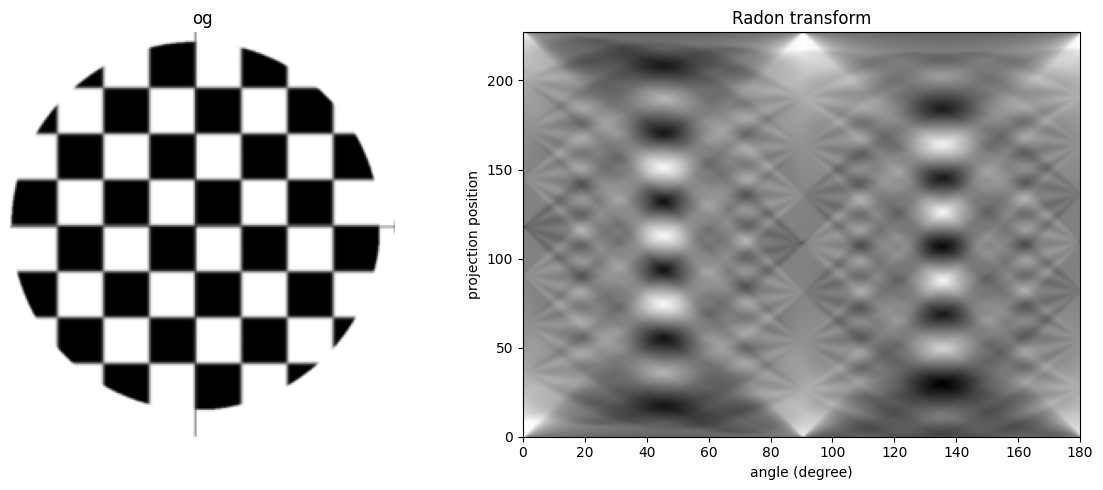

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon
from skimage.transform import rescale
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image

image = Image.open('chessboard.png').convert('RGB')
image = np.array(image)
image = rgb2gray(image)
image = rescale(image, scale=0.5, mode='reflect', anti_aliasing=True)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


ax1.imshow(image, cmap='gray')
ax1.set_title('og')
ax1.set_axis_off()


ax2.imshow(sinogram, cmap='gray',
           extent=(0, 180, 0, sinogram.shape[0]),
           aspect='auto')
ax2.set_title('Radon transform')
ax2.set_xlabel('angle (degree)')
ax2.set_ylabel('projection position')

plt.tight_layout()
plt.show()